In [1]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.linear_model import SGDClassifier
# from sklearn.linear_model import LogisticRegression
from nltk.stem.snowball import SnowballStemmer
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
import numpy as np
import re


import matplotlib.pyplot as plt
%matplotlib inline

import nltk
import pandas as pd
import random

### Loading the data

In [2]:
from sklearn.datasets import fetch_20newsgroups
mydata_train = fetch_20newsgroups(subset='train', shuffle=True, remove = ('headers', 'footers', 'quotes'))

In [3]:
list(mydata_train)

['data', 'filenames', 'target_names', 'target', 'DESCR']

In [4]:
print('Training data size:', len(mydata_train['data']))

Training data size: 11314


In [5]:
mydata_train.target_names 

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
# Finding frequency of each category
targets, frequency = np.unique(mydata_train.target, return_counts=True)
targets, frequency 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591,
        594, 593, 599, 546, 564, 465, 377], dtype=int64))

In [7]:
targets_str = np.array(mydata_train.target_names)
print(list(zip(targets_str, frequency)))

[('alt.atheism', 480), ('comp.graphics', 584), ('comp.os.ms-windows.misc', 591), ('comp.sys.ibm.pc.hardware', 590), ('comp.sys.mac.hardware', 578), ('comp.windows.x', 593), ('misc.forsale', 585), ('rec.autos', 594), ('rec.motorcycles', 598), ('rec.sport.baseball', 597), ('rec.sport.hockey', 600), ('sci.crypt', 595), ('sci.electronics', 591), ('sci.med', 594), ('sci.space', 593), ('soc.religion.christian', 599), ('talk.politics.guns', 546), ('talk.politics.mideast', 564), ('talk.politics.misc', 465), ('talk.religion.misc', 377)]


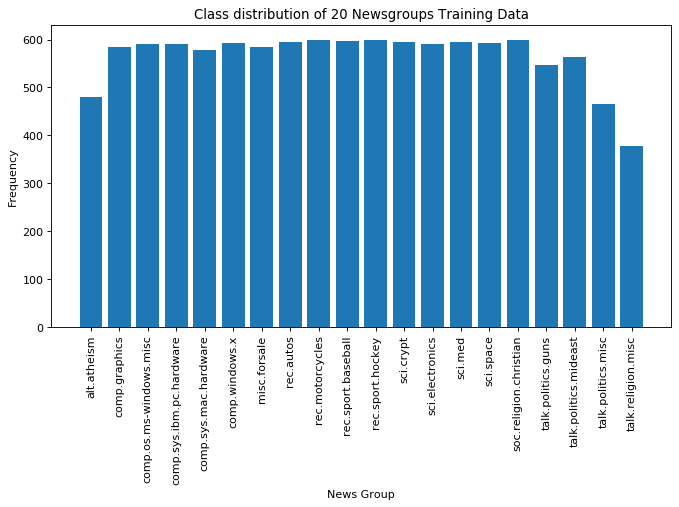

In [17]:
# Training data class distribution
fig=plt.figure(figsize=(10, 5), dpi= 80)
plt.bar(targets_str,frequency)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Training Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()

In [8]:
mydata_test = fetch_20newsgroups(subset='test', shuffle=True, remove = ('headers', 'footers', 'quotes'))

In [9]:
print('Testing data size:', len(mydata_test['data']))

Testing data size: 7532


In [18]:
targets_test, frequency_test = np.unique(mydata_test.target, return_counts=True)
targets_test_str = np.array(mydata_test.target_names)
print(list(zip(targets_test_str, frequency_test)))

[('alt.atheism', 319), ('comp.graphics', 389), ('comp.os.ms-windows.misc', 394), ('comp.sys.ibm.pc.hardware', 392), ('comp.sys.mac.hardware', 385), ('comp.windows.x', 395), ('misc.forsale', 390), ('rec.autos', 396), ('rec.motorcycles', 398), ('rec.sport.baseball', 397), ('rec.sport.hockey', 399), ('sci.crypt', 396), ('sci.electronics', 393), ('sci.med', 396), ('sci.space', 394), ('soc.religion.christian', 398), ('talk.politics.guns', 364), ('talk.politics.mideast', 376), ('talk.politics.misc', 310), ('talk.religion.misc', 251)]


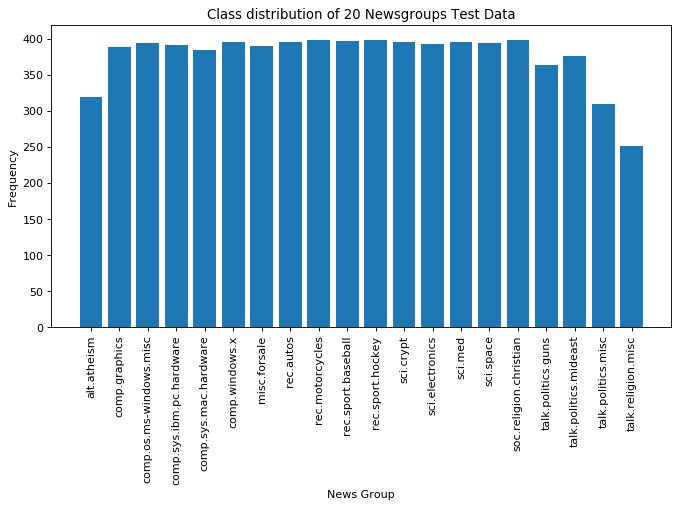

In [20]:
# Testing data class distribution
fig=plt.figure(figsize=(10, 5), dpi= 80)
plt.bar(targets_test_str,frequency_test)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Test Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()

### Data Preparation

In [10]:
mydata_train_df = pd.DataFrame({'data': mydata_train.data, 'target': mydata_train.target})
mydata_train_df.head()

,data,target
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4
2,"well folks, my mac plus finally gave up the gh...",4
3,\nDo you have Weitek's address/phone number? ...,1
4,"From article <C5owCB.n3p@world.std.com>, by to...",14


In [11]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
import re
import string

alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

mydata_train_df['data'] = mydata_train_df.data.map(alphanumeric).map(punc_lower)
mydata_train_df.head()

,data,target
0,i was wondering if anyone out there could enli...,7
1,a fair number of brave souls who upgraded thei...,4
2,well folks my mac plus finally gave up the gh...,4
3,\ndo you have weitek s address phone number ...,1
4,from article world std com by tombaker ...,14


In [12]:
mydata_test_df = pd.DataFrame({'data': mydata_test.data, 'target': mydata_test.target})
mydata_test_df.head()

,data,target
0,I am a little confused on all of the models of...,7
1,I'm not familiar at all with the format of the...,5
2,"\nIn a word, yes.\n",0
3,\nThey were attacking the Iraqis to drive them...,17
4,\nI've just spent two solid months arguing tha...,19


In [13]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

mydata_test_df['data'] = mydata_test_df.data.map(alphanumeric).map(punc_lower)
mydata_test_df.head()

,data,target
0,i am a little confused on all of the models of...,7
1,i m not familiar at all with the format of the...,5
2,\nin a word yes \n,0
3,\nthey were attacking the iraqis to drive them...,17
4,\ni ve just spent two solid months arguing tha...,19


### Vectorization

In [14]:
# Creating a document-term matrix using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfV = TfidfVectorizer(stop_words='english') 
# tfidfV = TfidfVectorizer(ngram_range=(1, 2), binary =True, stop_words='english') 

X_train_tfidfV = tfidfV.fit_transform(mydata_train_df.data) 
X_test_tfidfV = tfidfV.transform(mydata_test_df.data) 

print(X_train_tfidfV.shape)
print(type(X_train_tfidfV))

(11314, 67822)
<class 'scipy.sparse.csr.csr_matrix'>


In [15]:
X_train_tfidfV_df = pd.DataFrame(X_train_tfidfV.todense())
X_train_tfidfV_df.columns = sorted(tfidfV.vocabulary_)
X_train_tfidfV_df.head()

,aa,aaa,aaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg,aaah,aaahh,aaahhhh,aaai,aacc,aachen,...,zznkjz,zznkzz,zznp,zzrk,zzz,zzzoh,zzzzzz,zzzzzzt,³ation,ýé
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### ML Model

In [21]:
from sklearn.naive_bayes import MultinomialNB 

mnb = MultinomialNB() 

# Train the model 
y_train = mydata_train_df.target
mnb.fit(X_train_tfidfV, y_train) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
y_pred_tfidf_mnb = mnb.predict(X_test_tfidfV) 
y_pred_tfidf_mnb # The output is all of the predictions

array([ 7,  1, 15, ...,  9,  3, 15])

In [23]:
from sklearn.metrics import classification_report, accuracy_score

y_test = mydata_test_df.target
print(accuracy_score(y_test, y_pred_tfidf_mnb))
print(classification_report(y_test, y_pred_tfidf_mnb))

0.6751194901752523
              precision    recall  f1-score   support

           0       0.77      0.19      0.31       319
           1       0.66      0.68      0.67       389
           2       0.67      0.60      0.63       394
           3       0.56      0.73      0.63       392
           4       0.75      0.64      0.69       385
           5       0.80      0.76      0.78       395
           6       0.80      0.75      0.77       390
           7       0.84      0.71      0.77       396
           8       0.85      0.73      0.79       398
           9       0.92      0.81      0.86       397
          10       0.57      0.94      0.71       399
          11       0.59      0.80      0.68       396
          12       0.69      0.52      0.59       393
          13       0.88      0.76      0.81       396
          14       0.78      0.75      0.76       394
          15       0.38      0.92      0.54       398
          16       0.57      0.72      0.64       364
        

### Model Pipeline

In [24]:
# Performance of NB Classifier with No Stemming & Lemmatization
text_clf = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english', sublinear_tf=True)), 
        ('clf', MultinomialNB())])

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print(text_clf.score(mydata_test_df.data, mydata_test_df.target))

0.6692777482740307


### Stemming Process

In [35]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BGH55284\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BGH55284\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [31]:
stemmer = SnowballStemmer('english', ignore_stopwords=True)

class StemmedTfidfVectorizer(TfidfVectorizer):
    
    def __init__(self, stemmer, *args, **kwargs):
        super(StemmedTfidfVectorizer, self).__init__(*args, **kwargs)
        self.stemmer = stemmer
        
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: (self.stemmer.stem(word) for word in analyzer(doc.replace('\n', ' ')))

In [32]:
# Performance of NB Classifier with Stemming
text_clf = Pipeline([
        ('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english', sublinear_tf=True)),
        ('clf', MultinomialNB())]) 

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print(text_clf.score(mydata_test_df.data, mydata_test_df.target))

0.6648964418481147


### Simple Neural Network Model

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

In [65]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return(" ".join([lemmatizer.lemmatize(w,"v") for w in w_tokenizer.tokenize(text)]))

mydata_train_df["data_lemmatized"] = mydata_train_df.data.apply(lemmatize_text)
mydata_test_df["data_lemmatized"] = mydata_test_df.data.apply(lemmatize_text)


# Using TFidf Vectorizer and Removing words that appear in less that 0.05 percent of documents
tfidfV = TfidfVectorizer(stop_words='english', min_df = 0.0005) 


# Data  for Neural Networks
xTrain = tfidfV.fit_transform(mydata_train_df.data_lemmatized)
xTrain.sort_indices()
yTrainHot = to_categorical(mydata_train_df["target"], num_classes=20)
xTest = tfidfV.transform(mydata_test_df.data_lemmatized)
xTest.sort_indices()

print(xTrain.shape)

(11314, 11445)


In [67]:
# Defining the model
model1 = Sequential()
model1.add(Dense(1500, input_dim=xTrain.shape[1], activation='relu'))
model1.add(Dense(20, activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# # Model checkpoints and stoppers. Save the best weights and stops the model when no increase in performance to save time.
# esc = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
# cp = ModelCheckpoint(filepath="weights.hdf5", monitor='val_loss', verbose=1, save_best_only=True)

# batch_size = 128

# # fitting the model.
# m1 = model1.fit(xTrain, yTrainHot, batch_size=batch_size, epochs=500, callbacks=[esc, cp], validation_split=0.2)

In [69]:
m1 = model1.fit(xTrain, yTrainHot, epochs=5, batch_size=128)

Epoch 1/50
89/89 [==============================] - 11s 119ms/step - loss: 0.2546 - accuracy: 0.9456
Epoch 2/50
89/89 [==============================] - 11s 121ms/step - loss: 0.1614 - accuracy: 0.9650
Epoch 3/50
89/89 [==============================] - 11s 120ms/step - loss: 0.1282 - accuracy: 0.9692
Epoch 4/50
89/89 [==============================] - 10s 117ms/step - loss: 0.1132 - accuracy: 0.9708
Epoch 5/50
89/89 [==============================] - 10s 111ms/step - loss: 0.1069 - accuracy: 0.9715
Epoch 6/50
89/89 [==============================] - 10s 109ms/step - loss: 0.1027 - accuracy: 0.9711
Epoch 7/50
89/89 [==============================] - 10s 110ms/step - loss: 0.1014 - accuracy: 0.9709
Epoch 8/50
89/89 [==============================] - 10s 109ms/step - loss: 0.0981 - accuracy: 0.9709
Epoch 9/50
89/89 [==============================] - 10s 107ms/step - loss: 0.0976 - accuracy: 0.9711
Epoch 10/50
89/89 [==============================] - 10s 110ms/step - loss: 0.0962 - accura

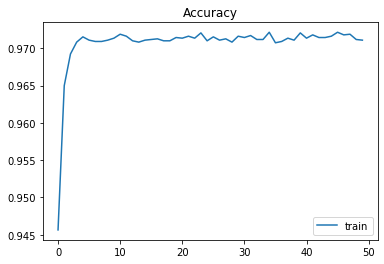

In [72]:
# Training Accuracy History
plt.title('Accuracy')
plt.plot(m1.history['accuracy'], label='train')
plt.legend()
plt.show();

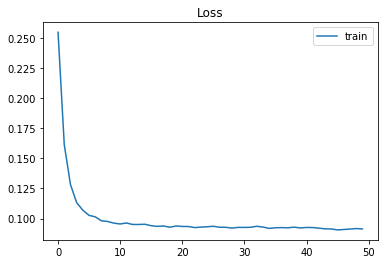

In [73]:
# Training Loss History
plt.title('Loss')
plt.plot(m1.history['loss'], label='train')
plt.legend()
plt.show();

In [76]:
# Testing

# predicting classes for testing cases.
yP1 = model1.predict(xTest)
yP2 = np.argmax(yP1,axis=1)

# Accuracy
np.mean(yP2 == mydata_test_df["target"])

0.6634360063728093

### Final Code for CI/CD pipeline

In [7]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import joblib

newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

vectorizer = TfidfVectorizer()

vectors = vectorizer.fit_transform(newsgroups_train.data)

joblib.dump(vectors, "TfidfVectorizer.joblib")

vectors_test = vectorizer.transform(newsgroups_test.data)


clf = MultinomialNB(alpha=.01)
clf.fit(vectors, newsgroups_train.target)

pred = clf.predict(vectors_test)

print(pred)
metrics.f1_score(newsgroups_test.target, pred, average='macro')

[ 7  1 15 ... 11 12 15]


0.682861129525057

In [8]:
new_data = ['I am a little confused on all of the models of the 88-89 bonnevilles.\nI have heard of the LE SE LSE SSE SSEI. Could someone tell me the\ndifferences are far as features or performance. I am also curious to\nknow what the book value is for prefereably the 89 model. And how much\nless than book value can you usually get them for. In other words how\nmuch are they in demand this time of year. I have heard that the mid-spring\nearly summer is the best time to buy.']

In [9]:
new_data_vect = vectorizer.transform(new_data)

In [10]:
clf.predict(new_data_vect)

array([7])

In [11]:
newsgroups_test.target

array([ 7,  5,  0, ...,  9,  6, 15])

In [13]:
newsgroups_test.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [15]:
newsgroups_test.target_names[7]

'rec.autos'

In [17]:
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']